In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\Niranjan\Desktop\Data Science\datasets\california_crime_2013_edited.xlsx")
df.head(5)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny theft,Motor vehicle theft,Arson
0,Adelanto,31165,198,2,15,52,129,886,381,372,133,17
1,Agoura Hills,20762,19,0,2,10,7,306,109,185,12,7
2,Alameda,76206,158,0,10,85,63,1902,287,1285,330,17
3,Albany,19104,29,0,1,24,4,557,94,388,75,7
4,Alhambra,84710,163,1,9,81,72,1774,344,1196,234,7


In [3]:
df.count()

City                                    462
Population                              462
Violent crime                           462
Murder and nonnegligent manslaughter    462
Rape                                    462
Robbery                                 462
Aggravated assault                      462
Property crime                          462
Burglary                                462
Larceny theft                           462
Motor vehicle theft                     462
Arson                                   462
dtype: int64

In [4]:
df.isna().sum()

City                                    0
Population                              0
Violent crime                           0
Murder and nonnegligent manslaughter    0
Rape                                    0
Robbery                                 0
Aggravated assault                      0
Property crime                          0
Burglary                                0
Larceny theft                           0
Motor vehicle theft                     0
Arson                                   0
dtype: int64

              City  Population  Violent crime  \
148         Fresno      508876           2552   
234    Los Angeles     3878725          16524   
353      San Diego     1349306           5303   
356  San Francisco      833863           7064   
360       San Jose      992143           3215   

     Murder and nonnegligent manslaughter  Rape  Robbery  Aggravated assault  \
148                                    40    53      903                1556   
234                                   251   764     7885                7624   
353                                    39   316     1456                3492   
356                                    48   161     4202                2653   
360                                    38   270     1095                1812   

     Property crime  Burglary  Larceny theft  Motor vehicle theft  Arson  
148           22584      5223          13304                 4057    184  
234           85844     15728          55734                14382   1430  

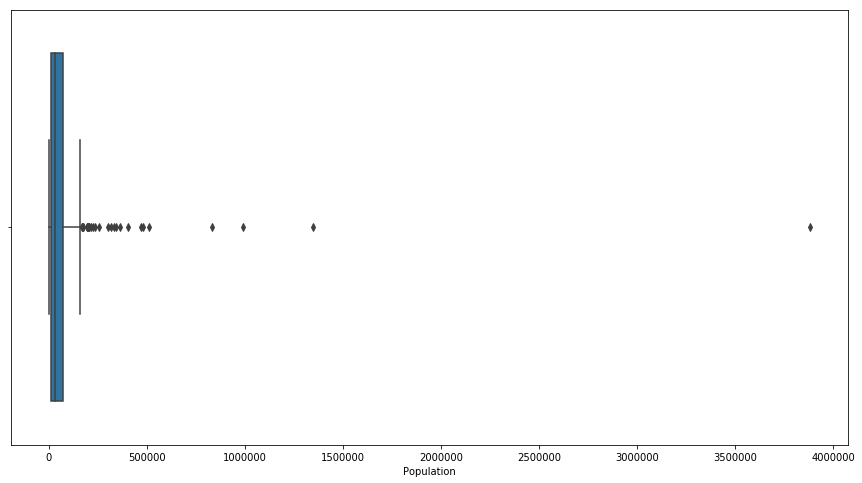

In [5]:
plt.subplots(figsize=(15,8))
sns.boxplot(x=df["Population"])
print(df.query('Population > 500000'))


In [6]:
df.query('Population > 130000').count()

City                                    42
Population                              42
Violent crime                           42
Murder and nonnegligent manslaughter    42
Rape                                    42
Robbery                                 42
Aggravated assault                      42
Property crime                          42
Burglary                                42
Larceny theft                           42
Motor vehicle theft                     42
Arson                                   42
dtype: int64

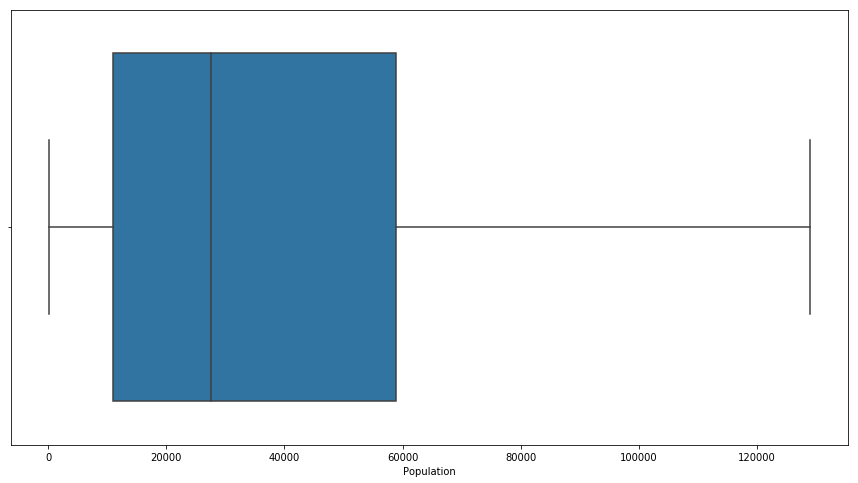

In [7]:
df1 = df.query('Population < 130000')
plt.subplots(figsize=(15,8))
sns.boxplot(x=df1["Population"])

In [8]:
df1['PopulationSquare'] = df1['Population'] * df1['Population']
df1['MurderCat'] = np.where(df1['Murder and nonnegligent manslaughter'] > 0, 1, 0)
df1['RobberyCat'] = df1.apply(lambda row: 1 if row.Robbery > 0 else 0, axis=1)
df1.head(5)

c:\users\niranjan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\niranjan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\niranjan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny theft,Motor vehicle theft,Arson,PopulationSquare,MurderCat,RobberyCat
0,Adelanto,31165,198,2,15,52,129,886,381,372,133,17,971257225,1,1
1,Agoura Hills,20762,19,0,2,10,7,306,109,185,12,7,431060644,0,1
2,Alameda,76206,158,0,10,85,63,1902,287,1285,330,17,5807354436,0,1
3,Albany,19104,29,0,1,24,4,557,94,388,75,7,364962816,0,1
4,Alhambra,84710,163,1,9,81,72,1774,344,1196,234,7,7175784100,1,1


In [9]:
#Multiple Linear Regression
#𝑃𝑟𝑜𝑝𝑒𝑟𝑡𝑦𝑐𝑟𝑖𝑚𝑒=𝛼+𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛+𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛2+𝑀𝑢𝑟𝑑𝑒𝑟+𝑅𝑜𝑏𝑏𝑒𝑟𝑦
from sklearn import linear_model
Xs = pd.DataFrame(data=df1, columns=['Population','PopulationSquare','MurderCat','RobberyCat'])
Y = df1['Property crime'].values.reshape(-1,1)
reg = linear_model.LinearRegression()
reg.fit(Xs, Y)
print("The linear model is: PropertyCrime = {:.5} + {:.5}*Population + {:.5}*PopulationSquare + {:.5}*Murder + {:.5}*Robbery".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2], reg.coef_[0][3]))

The linear model is: PropertyCrime = -10.08 + 0.015487*Population + 8.953e-08*PopulationSquare + 292.16*Murder + 75.824*Robbery


In [10]:
#Reshape rearranges the array to the shape specified. (3,2) would mean 3sets with 2 elements in each set. -1 would indicate a system value depending on the size of the array
df1['Property crime']
df1['Property crime'].values.reshape(-1,1)

array([[ 886],
       [ 306],
       [1902],
       [ 557],
       [1774],
       [ 315],
       [  71],
       [ 510],
       [ 721],
       [4440],
       [1594],
       [1518],
       [ 841],
       [ 455],
       [ 323],
       [ 744],
       [ 544],
       [ 115],
       [1323],
       [ 302],
       [  88],
       [ 147],
       [1098],
       [1370],
       [ 808],
       [ 785],
       [ 111],
       [1298],
       [ 535],
       [1882],
       [ 763],
       [ 437],
       [  26],
       [ 383],
       [5377],
       [1179],
       [ 215],
       [  34],
       [ 108],
       [ 693],
       [  16],
       [1211],
       [1210],
       [1214],
       [  98],
       [  55],
       [  62],
       [2165],
       [2430],
       [ 665],
       [ 313],
       [1474],
       [ 683],
       [ 165],
       [  75],
       [1130],
       [1563],
       [ 157],
       [ 600],
       [2085],
       [ 105],
       [ 261],
       [2251],
       [1118],
       [ 695],
       [1720],
       [18

In [11]:
import statsmodels.api as sm
X = np.column_stack((df1['Population'], df1['PopulationSquare'], df1['MurderCat'], df1['RobberyCat']))
y = df1['Property crime']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     376.0
Date:                Fri, 05 Jul 2019   Prob (F-statistic):          1.66e-136
Time:                        15:50:49   Log-Likelihood:                -3180.8
No. Observations:                 420   AIC:                             6372.
Df Residuals:                     415   BIC:                             6392.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.0802     81.044     -0.124      0.9

In [12]:
X = np.column_stack((df1['Population'], df1['PopulationSquare'], df1['MurderCat']))
y = df1['Property crime']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     501.5
Date:                Fri, 05 Jul 2019   Prob (F-statistic):          9.53e-138
Time:                        15:50:49   Log-Likelihood:                -3181.1
No. Observations:                 420   AIC:                             6370.
Df Residuals:                     416   BIC:                             6386.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.5032     48.107      0.904      0.3

In [13]:
#Cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(reg, Xs, Y, cv=10)

array([0.7765811 , 0.83461515, 0.76945147, 0.85367283, 0.72634973,
       0.62848617, 0.68600764, 0.75805554, 0.57579452, 0.82709898])

In [14]:
#HoldOut group
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(Xs, Y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(reg.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(reg.fit(Xs, Y).score(Xs, Y)))

With 20% Holdout: 0.7814602514276681
Testing on Sample: 0.7837453803055319


In [26]:
print(reg.fit(Xs, Y).predict(Xs).ravel())
print(Y.ravel())

[ 9.27510037e+02  4.25878054e+02  1.76588015e+03  3.94282832e+02
  2.31225399e+03  1.06404197e+03  4.00064545e+02  4.12593136e+02
  2.31260924e+02  3.02090866e+03  1.91328578e+03  1.26142024e+03
  6.62029377e+02  3.66681853e+02  6.42130948e+02  7.10902993e+02
  8.81036902e+02  1.83200522e+02  8.80375596e+02  2.96137557e+02
  1.25515327e+02  3.12966844e+02  1.30163580e+03  2.07376524e+03
  9.13602635e+02  7.64288241e+02  7.49762299e+01  1.12534418e+03
  7.37728603e+02  2.09864518e+03  1.18891957e+03  8.35168059e+02
  2.31547052e+01  5.60527965e+02  3.36698289e+03  7.12682101e+02
  1.47777906e+02  1.66802304e+01  1.26873679e+02  7.15482102e+02
  6.75024607e+00  5.23958744e+02  1.13425111e+03  1.17069249e+03
  1.36091879e+02  1.34009496e+02  1.44221563e+02  2.24893909e+03
  2.66959527e+03  6.09596713e+02  4.91258046e+02  8.17779393e+02
  2.88255002e+02  1.97367480e+02  1.49074705e+02  1.48260626e+03
  1.13309074e+03  1.70132918e+02  5.22380221e+02  3.16257643e+03
  1.26420755e+02  2.87325

In [27]:
a = reg.fit(X_train, y_train).predict(X_test).ravel()
a = np.round(a,2)
print(a)
print(y_test.ravel())

[ 5.01340e+02  2.44000e+01  3.55210e+02  2.21270e+02  4.11410e+02
  1.44100e+01  2.65300e+01  1.72546e+03  8.85100e+01  9.71300e+02
  3.29020e+03  1.82609e+03  2.37880e+02  3.22292e+03  1.91805e+03
  8.91990e+02  1.16857e+03  8.89700e+01  1.65050e+02  3.08041e+03
  1.50571e+03  1.46160e+03  1.16263e+03  1.48550e+02  7.62000e+02
  8.18930e+02  2.61850e+02  2.16361e+03  3.12874e+03  1.54800e+02
  2.22751e+03  1.15300e+03  2.91959e+03  6.02090e+02  1.23022e+03
  2.12720e+02  4.04150e+02  1.55830e+02  5.52630e+02  3.07080e+02
  2.14170e+02  6.11600e+02  4.78500e+02  4.30000e+02  2.36745e+03
  1.46316e+03  1.02583e+03  2.95995e+03  1.47690e+02  5.05840e+02
  8.82700e+02  1.13647e+03  2.18491e+03  1.97335e+03  7.65590e+02
  1.56860e+02  1.51510e+03  1.31360e+02  2.98009e+03  9.41910e+02
 -1.96000e+00  1.72180e+03  3.34310e+02  6.62120e+02  2.33800e+02
  3.25630e+02  2.66370e+03  2.41386e+03  2.69540e+02  1.18622e+03
  2.62858e+03  5.01910e+02  2.47850e+02  8.54470e+02  1.02832e+03
  1.33220e

In [16]:
correlation_matrix = Xs.corr()
display(correlation_matrix)

,Population,PopulationSquare,MurderCat,RobberyCat
Population,1.000000,0.954411,0.448306,0.303179
PopulationSquare,0.954411,1.000000,0.395338,0.205949
MurderCat,0.448306,0.395338,1.000000,0.249863
RobberyCat,0.303179,0.205949,0.249863,1.000000


In [29]:
#model2
X3 = np.column_stack((df1['PopulationSquare'], df1['MurderCat']))
y3 = df1['Property crime']
X2 = sm.add_constant(X3)
est = sm.OLS(y3, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         Property crime   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     663.0
Date:                Fri, 05 Jul 2019   Prob (F-statistic):          3.07e-130
Time:                        16:55:41   Log-Likelihood:                -3202.0
No. Observations:                 420   AIC:                             6410.
Df Residuals:                     417   BIC:                             6422.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        283.7919     32.964      8.609      0.0

In [31]:
#Cross validation for model2
cross_val_score(reg, X3, y3, cv=10)

array([0.80011   , 0.78543534, 0.74482819, 0.81789565, 0.73139438,
       0.56283227, 0.62333751, 0.75251005, 0.47638184, 0.84592394])